In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter(action="ignore")

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Desktop'

In [4]:
os.chdir("C:\\Users\\Desktop\\config csv or excel")

In [5]:
os.getcwd()

'C:\\Users\\Desktop\\config csv or excel'

In [9]:
tweets_df=pd.read_csv("omicron.csv")

In [10]:
print(f"data shape: {tweets_df.shape}")

data shape: (78168, 16)


In [11]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78168 entries, 0 to 78167
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                78168 non-null  int64 
 1   user_name         78168 non-null  object
 2   user_location     61122 non-null  object
 3   user_description  73693 non-null  object
 4   user_created      78168 non-null  object
 5   user_followers    78168 non-null  int64 
 6   user_friends      78168 non-null  int64 
 7   user_favourites   78168 non-null  int64 
 8   user_verified     78168 non-null  bool  
 9   date              78168 non-null  object
 10  text              78168 non-null  object
 11  hashtags          54673 non-null  object
 12  source            78168 non-null  object
 13  retweets          78168 non-null  int64 
 14  favorites         78168 non-null  int64 
 15  is_retweet        78168 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 8.5+ MB


In [12]:
tweets_df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,7.816800e+04,7.816800e+04,78168.000000,7.816800e+04,78168.000000,78168.000000
mean,1.474922e+18,1.621342e+05,1826.918215,1.828934e+04,1.869090,6.317867
std,7.954872e+15,1.124701e+06,9064.529514,5.386442e+04,21.294972,92.581616
min,1.465648e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.468108e+18,1.000000e+02,88.000000,3.700000e+02,0.000000,0.000000
50%,1.471580e+18,7.800000e+02,438.000000,2.069000e+03,0.000000,1.000000
75%,1.481682e+18,4.521000e+03,1553.000000,1.320775e+04,1.000000,2.000000
max,1.490261e+18,1.668546e+07,386228.000000,1.471907e+06,3808.000000,21790.000000


In [13]:
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False
3,1465689607165591552,Electrical Review,United Kingdom,Electrical Review is a monthly journal aimed a...,2009-05-21 08:32:19,20759,2321,739,False,2021-11-30 14:30:08,#Automation systems have become increasingly c...,['Automation'],Hootsuite Inc.,0,0,False
4,1465688203709464578,BingX Academy 🔑,NaN,BingX (Prev. Bingbon) is the world's top crypt...,2013-12-31 02:57:32,17134,8,31,False,2021-11-30 14:24:33,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",NaN,Twitter Web App,2,2,False


In [14]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [15]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,17046,4475,0,0,0,0,0,0,0,23495,0,0,0,0
Percent,0.0,0.0,21.806877,5.724849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.057057,0.0,0.0,0.0,0.0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [16]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [17]:
unique_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,78168,78168,61122,73693,78168,78168,78168,78168,78168,78168,78168,54673,78168,78168,78168,78168
Uniques,78168,33812,11184,32663,33934,15085,6959,22526,2,73038,78046,22395,333,223,459,1


In [18]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [19]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,78168,78168,61122,73693,78168,78168,78168,78168,78168,78168,78168,54673,78168,78168,78168,78168
Most frequent item,1465693385088323591,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,48,11,0,False,2021-12-14 11:00:28,Nepal imposes ban on entry from nine countries...,['Omicron'],Twitter Web App,0,0,False
Frequence,1,5557,5818,5557,5557,1885,3118,1721,67352,11,8,14109,27654,52210,38505,78168
Percent from total,0.001,7.109,9.519,7.541,7.109,2.411,3.989,2.202,86.163,0.014,0.01,25.806,35.378,66.792,49.259,100.0


In [20]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

In [21]:
import warnings
warnings.simplefilter(action="ignore")

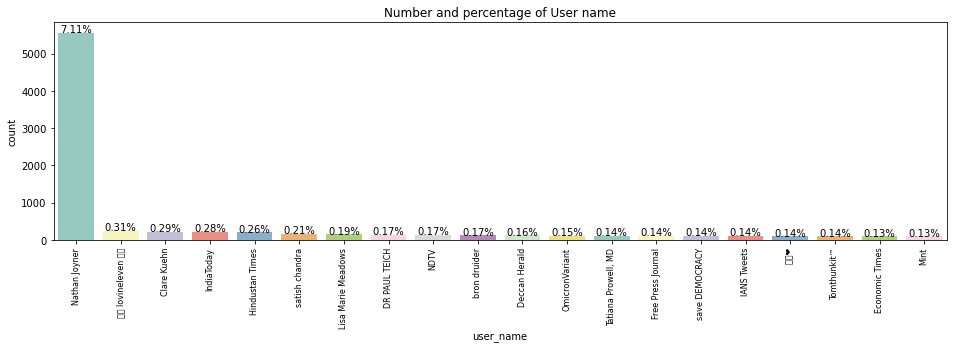

In [22]:
plot_count("user_name", "User name", tweets_df,4)

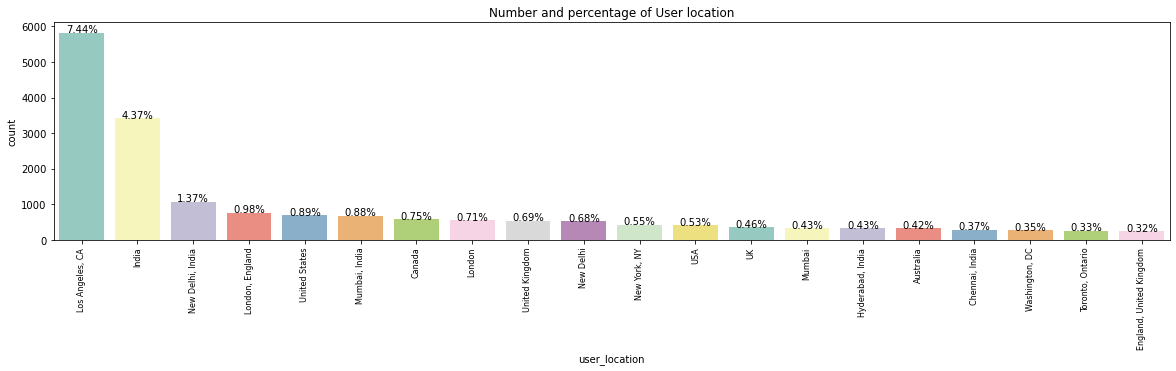

In [23]:
plot_count("user_location", "User location", tweets_df,5)

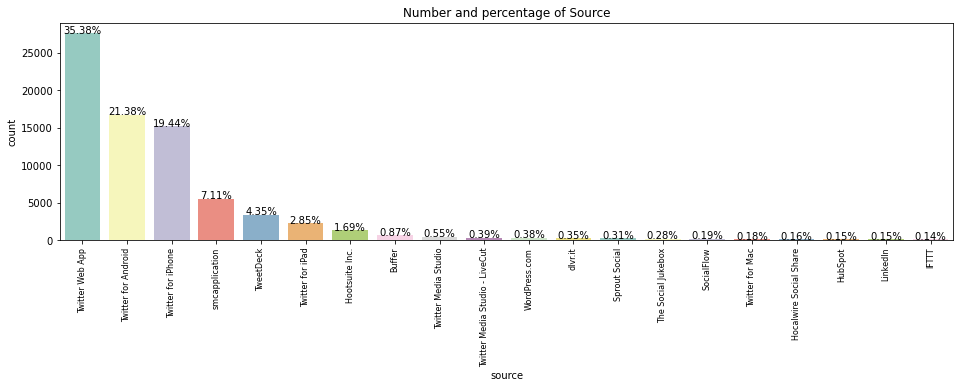

In [24]:
plot_count("source", "Source", tweets_df,4)

In [25]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

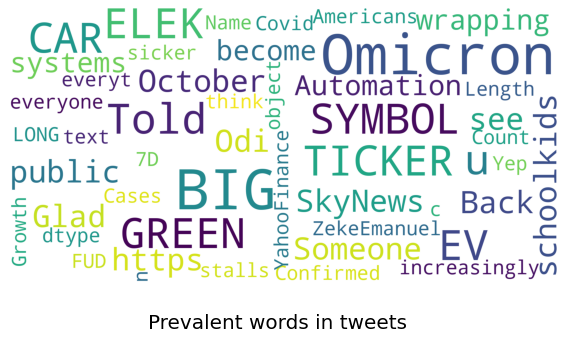

In [26]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

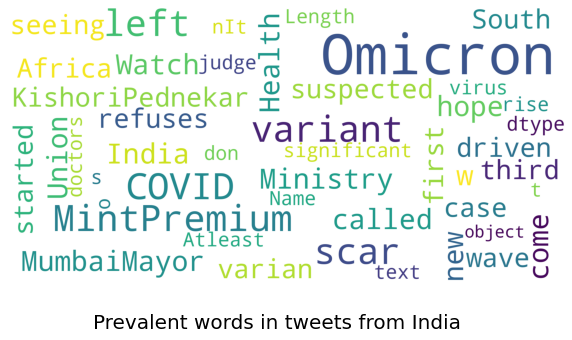

In [27]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

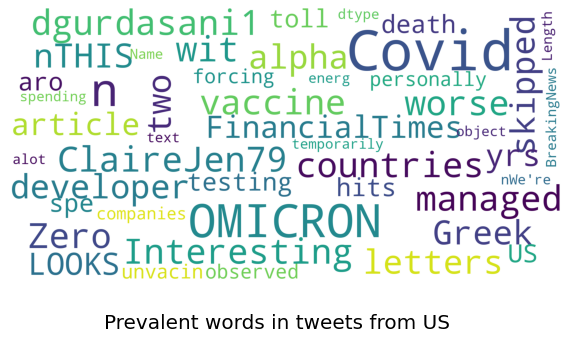

In [28]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

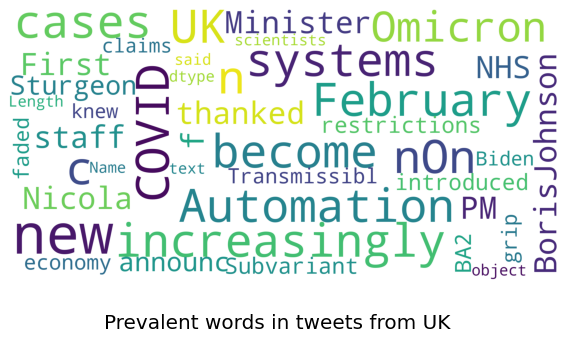

In [31]:
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

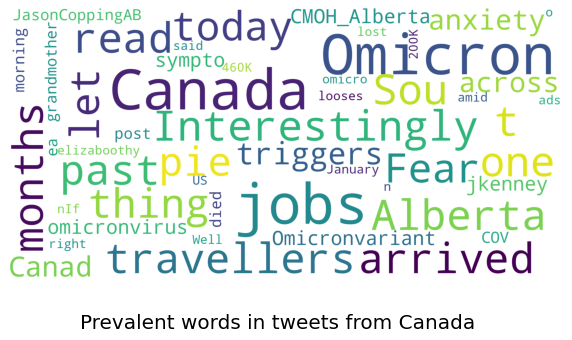

In [32]:
us_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from Canada')